<a href="https://colab.research.google.com/github/srivarshini-pratapaneni/srivarshini_INFO5731_spring2021/blob/main/In_class_exercise_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The ninth in-class-exercise (20 points in total, 4/16/2021)**

The purpose of the exercise is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from here: https://github.com/unt-iialab/info5731_spring2021/blob/main/class_exercises/exercise09_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [3]:
# Write your code here
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize  
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words=stopwords.words("english")

#reading the training dataset
train_df = pd.read_fwf(r"/content/stsa-train.txt", header = None)
train_df = train_df.rename(columns={0: "sentiment", 1: "comment"})
# Basic cleaning of the training data
clean_comment=[]
clean_text=[]
train_df['comment'] = train_df['comment'].str.replace(r"\W", " ").str.strip()# 1.To remove special characters and punctuations
train_df['comment']= train_df['comment'].str.replace(r'\d+',"") #2.To remove Numbers
for a in train_df['comment']:
    splitting_words=word_tokenize(str(a))
    for b in splitting_words:
        if b not in stop_words: #3.Removing Stop Words
            b=b.lower() # 4.Coverting text to lower case 
            clean_text.append(b)
    clean_comment.append(' '.join(clean_text))
    clean_text.clear()
train_df['comment']=pd.DataFrame(clean_comment) #column that we would be using for further analysis
#train_df
#reading the testing dataset
test_df = pd.read_fwf(r"/content/stsa-train.txt", header = None)
test_df = test_df.rename(columns={0: "sentiment", 1: "comment"})
#basic cleaning of test data
clean_comments=[]
clean_texts=[]
test_df['comment'] = test_df['comment'].str.replace(r"\W", " ").str.strip()# 1.To remove special characters and punctuations
test_df['comment']= test_df['comment'].str.replace(r'\d+',"") #2.To remove Numbers
for a in test_df['comment']:
    splitting_words=word_tokenize(str(a))
    for b in splitting_words:
        if b not in stop_words: #3.Removing Stop Words
            b=b.lower() # 4.Coverting text to lower case 
            clean_texts.append(b)
    clean_comments.append(' '.join(clean_texts))
    clean_texts.clear()
test_df['comment']=pd.DataFrame(clean_comments) #column that we would be using for further analysis
#test_df

#extra columns with NAN, that were generated while reading the file, removing those columns from both the dataframe
train_df


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,sentiment,comment,2
0,1,stirring funny finally transporting imagining ...,NaN
1,0,apparently reassembled cutting room floor give...,NaN
2,0,presume audience wo n sit still sociology less...,NaN
3,1,visually stunning rumination love memory histo...,NaN
4,1,jonathan parker bartleby end modern office ano...,NaN
...,...,...,...
6915,1,painful horrifying oppressively tragic film mi...,NaN
6916,0,take care nicely performed quintet actresses n...,NaN
6917,0,script covers huge heavy topics bland surfacey...,NaN
6918,0,seriously bad film seriously warped logic writ...,NaN


In [4]:
import sklearn
from sklearn.model_selection import train_test_split
x_train, x_validate, y_train, y_validate = sklearn.model_selection.train_test_split(train_df['comment'], train_df['sentiment'], train_size=0.8, test_size=0.2)
print("Number of values in Train and Test data after splitting:", x_train.shape, x_validate.shape) # shows the size of training and validation data(training is 80% and testing is 20%, there are 6920 rows)

# Setting k folds for conducting cross vaildation
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10)

Number of values in Train and Test data after splitting: (5536,) (1384,)


In [5]:
#Algorithm 1: multinomial NB
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer #for vect
from sklearn.feature_extraction.text import TfidfTransformer #for tfidf
from sklearn.naive_bayes import MultinomialNB # for clf
x_train = np.array(x_train) #converting to numpy array for error handling
y_train = np.array(y_train) #converting to numpy array for error handling

# Define a pipeline combining a text feature extractor with a simple classifier
# pipeline = pipeline: ['vect', 'tfidf', 'clf']
pipeline = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB())])
for train_index, test_index in k_fold.split(x_train, y_train):
    x_train_kfold, y_train_kfold = x_train[train_index], y_train[train_index]
    x_test_kfold, y_test_kfold = x_train[test_index], y_train[test_index]
    multinomial_NB = pipeline.fit(x_train_kfold, y_train_kfold)
pred_validate = multinomial_NB.predict(x_validate)
validation = {'Actual': y_validate, 'Predicted': pred_validate}
validation_df = pd.DataFrame(validation, columns = ['Actual', 'Predicted'])
print('The predicted sentiments for validation data, in case of multinomial_NB are:\n', validation_df.head())

#Predicting the sentiment on test dataset
predicted_sentiment_test = multinomial_NB.predict(test_df['comment'])

# finding the Evaluation measurement: Accuracy,Recall,Precison, F-1 score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
# Accuracy
Multinomial_accuracy=(accuracy_score(test_df['sentiment'], predicted_sentiment_test)*100)
print('The Accuracy of MultinomialNB is:',Multinomial_accuracy)
# Recall
Multinomial_NB_recall = recall_score(test_df['sentiment'], predicted_sentiment_test)
print('The Recall score for MultinomialNB is:',Multinomial_NB_recall)
# Precison 
Multinomial_NB_precision =  precision_score(test_df['sentiment'], predicted_sentiment_test)
print('The Precision Score for MultinomialNB is:', Multinomial_NB_precision)
# F-1 score
Multinomial_NB_f1_score = (f1_score(test_df['sentiment'], predicted_sentiment_test))
print('The f1_score for MultinomialNB is:', Multinomial_NB_f1_score)

The predicted sentiments for validation data, in case of multinomial_NB are:
       Actual  Predicted
5036       1          1
6446       1          1
3          1          1
877        1          1
2037       1          1
The Accuracy of MultinomialNB is: 89.84104046242774
The Recall score for MultinomialNB is: 0.9457063711911358
The Precision Score for MultinomialNB is: 0.8706962509563887
The f1_score for MultinomialNB is: 0.9066525029876511


In [6]:
# Algorithm 2: SVM

from sklearn.svm import LinearSVC # for clf

# Define a pipeline combining a text feature extractor with a simple classifier
# pipeline = pipeline: ['vect', 'tfidf', 'clf']
pipeline = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', LinearSVC())])
for train_index, test_index in k_fold.split(x_train, y_train):
    x_train_kfold, y_train_kfold = x_train[train_index], y_train[train_index]
    x_test_kfold, y_test_kfold = x_train[test_index], y_train[test_index]
    SVM_SVC = pipeline.fit(x_train_kfold, y_train_kfold)
pred_validate = SVM_SVC.predict(x_validate)
validation = {'Actual': y_validate, 'Predicted': pred_validate}
validation_df = pd.DataFrame(validation, columns = ['Actual', 'Predicted'])
print('The predicted sentiments for validation data in case of SVM are:\n', validation_df.head())

#Predicting the sentiment on test dataset
predicted_sentiment_test = SVM_SVC.predict(test_df['comment'])

# finding the Evaluation measurement: Accuracy,Recall,Precison, F-1 score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
# Accuracy
SVM_accuracy=(accuracy_score(test_df['sentiment'], predicted_sentiment_test)*100)
print('The accuracy of SVM is:',SVM_accuracy)
# Recall
SVM_recall = recall_score(test_df['sentiment'], predicted_sentiment_test)
print('The Recall score for SVM is:',SVM_recall)
# Precison 
SVM_precision =  precision_score(test_df['sentiment'], predicted_sentiment_test)
print('The precision Score for SVM is:', SVM_precision)
# F-1 score
SVM_f1_score = (f1_score(test_df['sentiment'], predicted_sentiment_test))
print('The f1_score for SVM is:', SVM_f1_score)

The predicted sentiments for validation data in case of SVM are:
       Actual  Predicted
5036       1          0
6446       1          1
3          1          1
877        1          1
2037       1          1
The accuracy of SVM is: 92.74566473988439
The Recall score for SVM is: 0.9409972299168975
The precision Score for SVM is: 0.921595225176343
The f1_score for SVM is: 0.9311951754385965


In [7]:
# Algorithm 3: KNN
from sklearn.neighbors import KNeighborsClassifier # for clf

# Define a pipeline combining a text feature extractor with a simple classifier
# pipeline = pipeline: ['vect', 'tfidf', 'clf']
pipeline = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', KNeighborsClassifier())])
for train_index, test_index in k_fold.split(x_train, y_train):
    x_train_kfold, y_train_kfold = x_train[train_index], y_train[train_index]
    x_test_kfold, y_test_kfold = x_train[test_index], y_train[test_index]
    KNN = pipeline.fit(x_train_kfold, y_train_kfold)
pred_validate = KNN.predict(x_validate)
validation = {'Actual': y_validate, 'Predicted': pred_validate}
validation_df = pd.DataFrame(validation, columns = ['Actual', 'Predicted'])
print('The predicted sentiment for validation data, in case of KNN are:\n', validation_df.head())

#Predicting the sentiment on test dataset
predicted_sentiment_test = KNN.predict(test_df['comment'])

# finding the Evaluation measurement: Accuracy,Recall,Precison, F-1 score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
# Accuracy
KNN_accuracy=(accuracy_score(test_df['sentiment'], predicted_sentiment_test)*100)
print('The accuracy of KNN algorithm is:',KNN_accuracy)
# Recall
KNN_recall = recall_score(test_df['sentiment'], predicted_sentiment_test)
print('The Recall score for KNN algorithm is:',KNN_recall)
# Precison 
KNN_precision =  precision_score(test_df['sentiment'], predicted_sentiment_test)
print('The precision Score for KNN algorithm is:', KNN_precision)
# F-1 score
KNN_f1_score = (f1_score(test_df['sentiment'], predicted_sentiment_test))
print('The f1_score for KNN algorithm is:', KNN_f1_score)

The predicted sentiment for validation data, in case of KNN are:
       Actual  Predicted
5036       1          0
6446       1          0
3          1          0
877        1          0
2037       1          0
The accuracy of KNN algorithm is: 63.72832369942196
The Recall score for KNN algorithm is: 0.3094182825484765
The precision Score for KNN algorithm is: 0.9850088183421517
The f1_score for KNN algorithm is: 0.4709106239460371


In [8]:
# Algorithm 4: Decision Tree
from sklearn import tree # for clf

# Define a pipeline combining a text feature extractor with a simple classifier
# pipeline = pipeline: ['vect', 'tfidf', 'clf']
pipeline = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', tree.DecisionTreeClassifier())])
for train_index, test_index in k_fold.split(x_train, y_train):
    x_train_kfold, y_train_kfold = x_train[train_index], y_train[train_index]
    x_test_kfold, y_test_kfold = x_train[test_index], y_train[test_index]
    Decision_tree = pipeline.fit(x_train_kfold, y_train_kfold)
pred_validate = Decision_tree.predict(x_validate)
validation = {'Actual': y_validate, 'Predicted': pred_validate}
validation_df = pd.DataFrame(validation, columns = ['Actual', 'Predicted'])
print('The predicted sentiment for validation data,in case of Decision Tree are:\n', validation_df.head())

#Predicting the sentiment on test dataset
predicted_sentiment_test = Decision_tree.predict(test_df['comment'])

# finding the Evaluation measurement: Accuracy,Recall,Precison, F-1 score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
# Accuracy
Decision_tree_accuracy=(accuracy_score(test_df['sentiment'], predicted_sentiment_test)*100)
print('The accuracy of Decision Tree algorithm is:',Decision_tree_accuracy)
# Recall
Decision_tree_recall = recall_score(test_df['sentiment'], predicted_sentiment_test)
print('The Recall score for Decision Tree algorithm is:',Decision_tree_recall)
# Precison 
Decision_tree_precision =  precision_score(test_df['sentiment'], predicted_sentiment_test)
print('The precision Score for Decision Tree algorithm is:', Decision_tree_precision)
# F-1 score
Decision_tree_f1_score = (f1_score(test_df['sentiment'], predicted_sentiment_test))
print('The f1_score for Decision Tree algorithm is:', Decision_tree_f1_score)

The predicted sentiment for validation data,in case of Decision Tree are:
       Actual  Predicted
5036       1          1
6446       1          0
3          1          1
877        1          1
2037       1          1
The accuracy of Decision Tree algorithm is: 90.02890173410405
The Recall score for Decision Tree algorithm is: 0.9013850415512465
The precision Score for Decision Tree algorithm is: 0.9069119286510591
The f1_score for Decision Tree algorithm is: 0.9041400388996944


In [9]:
# Algorithm 4: Random Forest
from sklearn.ensemble import RandomForestClassifier # for clf

# Define a pipeline combining a text feature extractor with a simple classifier
# pipeline = pipeline: ['vect', 'tfidf', 'clf']
pipeline = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', RandomForestClassifier())])
for train_index, test_index in k_fold.split(x_train, y_train):
    x_train_kfold, y_train_kfold = x_train[train_index], y_train[train_index]
    x_test_kfold, y_test_kfold = x_train[test_index], y_train[test_index]
    Random_Forest = pipeline.fit(x_train_kfold, y_train_kfold)
pred_validate = Random_Forest.predict(x_validate)
validation = {'Actual': y_validate, 'Predicted': pred_validate}
validation_df = pd.DataFrame(validation, columns = ['Actual', 'Predicted'])
print('The predicted sentiment for validation data in case of Random Forest are:\n', validation_df.head())

#Predicting the sentiment on test dataset
predicted_sentiment_test = Random_Forest.predict(test_df['comment'])

# finding the Evaluation measurement: Accuracy,Recall,Precison, F-1 score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
# Accuracy
Random_Forest_accuracy=(accuracy_score(test_df['sentiment'], predicted_sentiment_test)*100)
print('The accuracy of Random Forest algorithm is:',Random_Forest_accuracy)
# Recall
Random_Forest_recall = recall_score(test_df['sentiment'], predicted_sentiment_test)
print('The Recall score for Random Forest algorithm is:',Random_Forest_recall)
# Precison 
Random_Forest_precision =  precision_score(test_df['sentiment'], predicted_sentiment_test)
print('The precision Score for Random Forest algorithm is:', Random_Forest_precision)
# F-1 score
Random_Forest_f1_score = (f1_score(test_df['sentiment'], predicted_sentiment_test))
print('The f1_score for Random Forest algorithm is:', Random_Forest_f1_score)

The predicted sentiment for validation data in case of Random Forest are:
       Actual  Predicted
5036       1          1
6446       1          0
3          1          1
877        1          0
2037       1          1
The accuracy of Random Forest algorithm is: 92.1820809248555
The Recall score for Random Forest algorithm is: 0.9210526315789473
The precision Score for Random Forest algorithm is: 0.9285115889416364
The f1_score for Random Forest algorithm is: 0.9247670699485467


In [10]:
#Algorithm 6: XGBoost
from sklearn.ensemble import GradientBoostingClassifier # for clf

# Define a pipeline combining a text feature extractor with a simple classifier
# pipeline = pipeline: ['vect', 'tfidf', 'clf']
pipeline = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', GradientBoostingClassifier())])
for train_index, test_index in k_fold.split(x_train, y_train):
    x_train_kfold, y_train_kfold = x_train[train_index], y_train[train_index]
    x_test_kfold, y_test_kfold = x_train[test_index], y_train[test_index]
    XGBoost = pipeline.fit(x_train_kfold, y_train_kfold)
pred_validate = XGBoost.predict(x_validate)
validation = {'Actual': y_validate, 'Predicted': pred_validate}
validation_df = pd.DataFrame(validation, columns = ['Actual', 'Predicted'])
print('The predicted sentiments for validation data, in case of XGBoost are:\n', validation_df.head())

#Predicting the sentiment on test dataset
predicted_sentiment_test = XGBoost.predict(test_df['comment'])

# finding the Evaluation measurement: Accuracy,Recall,Precison, F-1 score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
# Accuracy
XGBoost_accuracy=(accuracy_score(test_df['sentiment'], predicted_sentiment_test)*100)
print('The accuracy of XGBoost algorithm is:',XGBoost_accuracy)
# Recall
XGBoost_recall = recall_score(test_df['sentiment'], predicted_sentiment_test)
print('The Recall score for XGBoost algorithm is:',XGBoost_recall)
# Precison 
XGBoost_precision =  precision_score(test_df['sentiment'], predicted_sentiment_test)
print('The precision Score for XGBoost algorithm is:', XGBoost_precision)
# F-1 score
XGBoost_f1_score = (f1_score(test_df['sentiment'], predicted_sentiment_test))
print('The f1_score for XGBoost algorithm is:', XGBoost_f1_score)

The predicted sentiments for validation data, in case of XGBoost are:
       Actual  Predicted
5036       1          1
6446       1          1
3          1          1
877        1          0
2037       1          1
The accuracy of XGBoost algorithm is: 70.23121387283237
The Recall score for XGBoost algorithm is: 0.8994459833795014
The precision Score for XGBoost algorithm is: 0.6567556634304207
The f1_score for XGBoost algorithm is: 0.7591769932195463


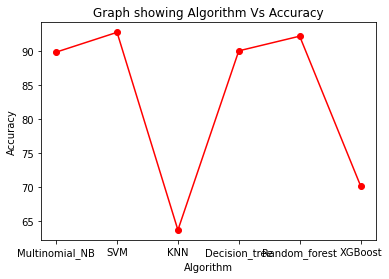

In [11]:
#comparing the algorithms accuracy using a graph
import matplotlib.pyplot as plt
Algorithms = ['Multinomial_NB', 'SVM', 'KNN', 'Decision_tree', 'Random_forest', 'XGBoost']
Accuracy = [Multinomial_accuracy,SVM_accuracy,KNN_accuracy,Decision_tree_accuracy,Random_Forest_accuracy,XGBoost_accuracy]
plt.plot(Algorithms, Accuracy, color='red', marker='o')
plt.title('Graph showing Algorithm Vs Accuracy')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.show()

The accuracy will always be the key measure to find the best algorithms. Hence, as per the above figure, svm got the highest accuracy and KNN got the least. They are 92 and 63 respectively.